# 0) installation de package manquant
1. appel système avec le point d'exclamation
2. appel de l'installateur de package : 

-pip (python classique )

-conda (python anaconda)

3. paramétrage de l'installateur avec l'option pour accepter les conditions par défaut d'installation des packages :  -y

Exemple : !conda install -y regex

#### Sinon, aller voir dans anaconda navigator pour une interface graphique

In [30]:
!conda install -y regex

Solving environment: done

# All requested packages already installed.



## usage de jupyter : fusion de cellules 
# MAJ + M

# 1) regular expressions

In [31]:
import regex as re
url ="https://github.com/romainjouin/esilv_5a.git"

## 1.1) regex greedy : le .* prend tout ce qu'il peut

In [25]:
pattern = "https://.*\.git"
model   = re.compile(pattern)
text    = url + " coucou .gita"+url
model.findall(text)

['https://github.com/romainjouin/esilv_5a.git coucou .gitahttps://github.com/romainjouin/esilv_5a.git']

## 1.2) regex lazzy : le .*? s'arrête dès qu'il peut

In [27]:
recherche = ".*?"
pattern   = f"https://{recherche}\.git"
model     = re.compile(pattern)
model.findall(text)

['https://github.com/romainjouin/esilv_5a.git',
 'https://github.com/romainjouin/esilv_5a.git']

# 2) webscrapping

In [49]:
import requests               # module de requête http
page = re.request('get', url) # on récupère une page 
html = page.text              # on récupère le contenu html de la page

### type de html => string => on peut l'analyser avec des regex !

In [47]:
type(html)

str

## 2.1) regex pour la récupération des liens 
un lien html => (<a href=> < /a>)

In [50]:
import regex as re

In [60]:
pattern_lien = "<a.*/a>"
model        = re.compile(pattern_lien)
liens        = model.findall(html)
len(liens)#[:3]

93

Question d'axel: comment récupérer les liens qui ne comprennent pas le mot github ?
- changer la regex en ajoutant un point d'exclamation (signifie la négation) avant le .* (idée de nicolas / alexis pense que ça march'ra pas mais il ne veut pas dire de bêtises)
- Simon : prendre tous les liens, une seconde regex avec les .git => filtre inversé avec la seconde regex
- Lindsay : ne pas utiliser une seconde rgex est il envisageable ?? Très bonne idée !! -> comment faire ? Romain propose de faire un filtre

## 2.2) regex sur regex (simon)

In [61]:
seconde_regex = ".*?\.git"

second_model = re.compile(seconde_regex)
liens_git = second_model.findall(html)
liens_git[:3]

['  <link rel="dns-prefetch" href="https://github.git',
 '  <link rel="dns-prefetch" href="https://avatars0.git',
 '  <link rel="dns-prefetch" href="https://avatars1.git']

In [65]:
[lien for lien in liens if not second_model.findall(lien)][:3]

['<a href="#start-of-content" tabindex="1" class="px-2 py-4 bg-blue text-white show-on-focus js-skip-to-content">Skip to content</a>',
 '<a href="/features" class="py-2 lh-condensed-ultra d-block link-gray-dark no-underline h5 Bump-link--hover" data-ga-click="(Logged out) Header, go to Features">Features <span class="Bump-link-symbol float-right text-normal text-gray-light">&rarr;</span></a>',
 '<a href="/features/code-review/" class="py-2 lh-condensed-ultra d-block link-gray no-underline f5" data-ga-click="(Logged out) Header, go to Code review">Code review</a>']

## 2.3) filtre (romain)

In [74]:
l1 = list(filter(lambda lien: ".git" not in lien, liens)) 
l2 = [lien for lien in liens if not second_model.findall(lien)]

In [75]:
len(l1), len(l2)

(83, 83)

In [76]:
l1==l2

True

# 3) mieux que les regex : la soupe !

In [77]:
from bs4 import BeautifulSoup

In [78]:
soup = BeautifulSoup(html)

## 3.1) trouver tous les liens

In [90]:
selector = "a"
liens    = soup.find_all(selector)
len(liens)

122

## 3.3) trouver les éléments du dom qui ont une certaine classe

In [92]:
selector = "px-2"
nodes    = soup.find_all(class_=selector)
len(nodes)

2

## 3.4) trouver les éléments avec deux classes données

In [104]:
selector = {'class':['py-2', 'lh-condensed-ultra']}
nodes    = soup.find_all(True, selector)
len(nodes)

32

# 4) exploration des noeuds

In [107]:
un_noeud = nodes[0]

In [112]:
type(un_noeud)

bs4.element.Tag

## 4.1) les noeuds ont des textes

In [111]:
un_noeud.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                    Why GitHub?\n                    \n\n\n\n\nFeatures →\n\nCode review\nProject management\nIntegrations\nActions\nPackage registry\nTeam management\nSocial coding\nDocumentation\nCode hosting\n\n\nCustomer stories →\nSecurity →\n\n\n\n\n\nEnterprise\n\n\n\n\n                    Explore\n                    \n\n\n\n\n\nExplore GitHub →\n\nLearn & contribute\n\nTopics\nCollections\nTrending\nLearning Lab\nOpen source guides\n\nConnect with others\n\nEvents\nCommunity forum\nGitHub Education\n\n\n\n\n\nMarketplace\n\n\n\n\n                    Pricing\n                    \n\n\n\n\nPlans →\n\nCompare plans\nContact Sales\n\n\nNonprofit →\nEducation →\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        In this repository\n      \n\n        All GitHub\n      \n↵\n\n\n      Jump to\n      ↵\n\n\n\n\n\n\nNo suggested jump to results\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        In this repository\n      \n\n        All GitHub\n   

In [117]:
len(un_noeud.text)

1044

## 4.2) on peut se balader dans le DOM 

In [115]:
len(un_noeud.parent.text)

1063

In [120]:
str(child)

'\n'

In [132]:
for child in un_noeud.children:
    try:
        print(child)
    except Exception as e:
        pass



<div class="container-lg d-flex px-3">
<div class="d-flex flex-justify-between flex-items-center">
<a aria-label="Homepage" class="mr-4" data-ga-click="(Logged out) Header, go to homepage, icon:logo-wordmark" href="https://github.com/">
<svg aria-hidden="true" class="octicon octicon-mark-github text-white" height="32" version="1.1" viewbox="0 0 16 16" width="32"><path d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0 0 16 8c0-4.42-3.58-8-8-8z" fill-rule="evenodd"></path></svg>
</a>
</div>
<div c

In [136]:
_ = list(un_noeud.children)[1]
type(_)

bs4.element.Tag

In [141]:
len(list(_.children))

5

# 5) analyse météo
url sur https://github.com/romainjouin/esilv_5a/blob/master/url_meteo

In [142]:
url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = requests.request("get", url )
html  = page.text
soup  = BeautifulSoup(html)

## 5.1) vérifier la tête de la page récupérée en l'enregistrant dans un fichier afin de pouvoir l'ouvrir via un navigateur

In [146]:
with open("meteo.html", "a") as f:
    f.writelines(html)

## 5.2) récupérer le tableau de données

In [150]:
hour         = 17
css_selector = f'tr.cdata-hour{hour} td'
table_row    = soup.select(css_selector)

In [158]:
table_row_data = [cellule.text for cellule in table_row]

In [159]:
table_row_data

['19h',
 '17.7 °C',
 '0 mm/1h',
 '51%',
 '7.4 °C',
 '18 km/h(39.6 km/h)',
 '1021.1hPa',
 '20 km']

## 5.3) transformer en fonction

In [160]:
def get_data_hour(soup, hour):
    css_selector   = f'tr.cdata-hour{hour} td'
    table_row      = soup.select(css_selector)
    table_row_data = [cellule.text for cellule in table_row]
    return table_row_data

## Comment récupérer toutes les heures ? 
- Alexis : faire une boucle avec itération classique
- Nicolas : prendre toute la table, et faire des splits 
- Romain : changer le selecteur pour qu'il prennent toutes les heures
- Junhui : avec une expression régulière
- 

### alexis :

In [163]:
liste = []
for hour in range(24):
    liste.append(get_data_hour(soup, hour))

## comprehension list 

In [167]:
liste = [get_data_hour(soup, hour) for hour in range(24)]

### map

In [194]:
liste = list(map(lambda x: get_data_hour(soup, x), range(24)))

# 6) Tout mettre dans pandas

In [195]:
import pandas as pd

df  = pd.DataFrame(liste)
df2 = df.dropna() # suppression des lignes vides
df2

,0,1,2,3,4,5,6,7
10,12h,17.8 °C,0 mm/1h,66%,11.4 °C,11 km/h(25.2 km/h),1021.1hPa,20 km
11,13h,17.4 °C,0 mm/1h,58%,9 °C,14 km/h(28.8 km/h),1021.2hPa,20 km
12,14h,19.2 °C,0 mm/1h,45%,7 °C,14 km/h(36 km/h),1020.9hPa,20 km
13,15h,18.7 °C,0 mm/1h,46%,6.8 °C,18 km/h(36 km/h),1020.8hPa,20 km
14,16h,18.3 °C,0 mm/1h,52%,8.3 °C,18 km/h(36 km/h),1020.7hPa,20 km
15,17h,18.3 °C,0 mm/1h,49%,7.4 °C,14 km/h(36 km/h),1020.8hPa,20 km
16,18h,17.8 °C,0 mm/1h,51%,7.5 °C,18 km/h(36 km/h),1021.0hPa,20 km
17,19h,17.7 °C,0 mm/1h,51%,7.4 °C,18 km/h(39.6 km/h),1021.1hPa,20 km
18,20h,16.8 °C,0 mm/1h,59%,8.7 °C,22 km/h(43.2 km/h),1021.6hPa,20 km
19,21h,15.4 °C,0 mm/1h,62%,8.2 °C,14 km/h(46.8 km/h),1022.2hPa,20 km


## 6.1) Rajouter des noms de colonnes à ma dataFrame pandas

In [199]:
example = liste[-1]
example

['01h',
 '13.9 °C',
 '0 mm/1h',
 '76%',
 '9.7 °C',
 '14 km/h(32.4 km/h)',
 '1023.0hPa',
 '20 km']

In [200]:
# trouver le dernier chiffre de chaque valeur, et extraire l'unité qui le suit

In [205]:
import string

In [216]:
mesure = example[1]
mesure

'13.9 °C'

In [229]:
def get_unite(mesure):
    mesure          = mesure.strip()
    mesure_inversee = mesure[::-1]
    for indice, car in enumerate(mesure_inversee):
        if car in string.digits:
            break
    unite_inversee = mesure_inversee[:indice]
    unite_correcte = unite_inversee[::-1]
    return unite_correcte

In [234]:
nouvelles_colonnes    = [get_unite(mesure) for mesure in example]
nouvelles_colonnes[2] = "mm/h"
nouvelles_colonnes

['h', ' °C', 'mm/h', '%', ' °C', ' km/h)', 'hPa', ' km']

In [235]:
import pandas as pd

df  = pd.DataFrame(liste, columns=nouvelles_colonnes)
df2 = df.dropna() # suppression des lignes vides
df2

,h,°C,mm/h,%,°C,km/h),hPa,km
10,12h,17.8 °C,0 mm/1h,66%,11.4 °C,11 km/h(25.2 km/h),1021.1hPa,20 km
11,13h,17.4 °C,0 mm/1h,58%,9 °C,14 km/h(28.8 km/h),1021.2hPa,20 km
12,14h,19.2 °C,0 mm/1h,45%,7 °C,14 km/h(36 km/h),1020.9hPa,20 km
13,15h,18.7 °C,0 mm/1h,46%,6.8 °C,18 km/h(36 km/h),1020.8hPa,20 km
14,16h,18.3 °C,0 mm/1h,52%,8.3 °C,18 km/h(36 km/h),1020.7hPa,20 km
15,17h,18.3 °C,0 mm/1h,49%,7.4 °C,14 km/h(36 km/h),1020.8hPa,20 km
16,18h,17.8 °C,0 mm/1h,51%,7.5 °C,18 km/h(36 km/h),1021.0hPa,20 km
17,19h,17.7 °C,0 mm/1h,51%,7.4 °C,18 km/h(39.6 km/h),1021.1hPa,20 km
18,20h,16.8 °C,0 mm/1h,59%,8.7 °C,22 km/h(43.2 km/h),1021.6hPa,20 km
19,21h,15.4 °C,0 mm/1h,62%,8.2 °C,14 km/h(46.8 km/h),1022.2hPa,20 km


In [243]:
col_percent

10    66%
11    58%
12    45%
13    46%
14    52%
15    49%
16    51%
17    51%
18    59%
19    62%
20    67%
21    69%
22    73%
23    76%
Name: %, dtype: object

In [244]:
col_percent = df2["%"]
col_percent = col_percent.apply(lambda x: int(x[:-1]))
df2.loc[:,"%"] =col_percent
df2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,h,°C,mm/h,%,°C,km/h),hPa,km
10,12h,17.8 °C,0 mm/1h,66,11.4 °C,11 km/h(25.2 km/h),1021.1hPa,20 km
11,13h,17.4 °C,0 mm/1h,58,9 °C,14 km/h(28.8 km/h),1021.2hPa,20 km
12,14h,19.2 °C,0 mm/1h,45,7 °C,14 km/h(36 km/h),1020.9hPa,20 km
13,15h,18.7 °C,0 mm/1h,46,6.8 °C,18 km/h(36 km/h),1020.8hPa,20 km
14,16h,18.3 °C,0 mm/1h,52,8.3 °C,18 km/h(36 km/h),1020.7hPa,20 km
15,17h,18.3 °C,0 mm/1h,49,7.4 °C,14 km/h(36 km/h),1020.8hPa,20 km
16,18h,17.8 °C,0 mm/1h,51,7.5 °C,18 km/h(36 km/h),1021.0hPa,20 km
17,19h,17.7 °C,0 mm/1h,51,7.4 °C,18 km/h(39.6 km/h),1021.1hPa,20 km
18,20h,16.8 °C,0 mm/1h,59,8.7 °C,22 km/h(43.2 km/h),1021.6hPa,20 km
19,21h,15.4 °C,0 mm/1h,62,8.2 °C,14 km/h(46.8 km/h),1022.2hPa,20 km


In [245]:
%matplotlib inline

In [248]:
import seaborn as sns

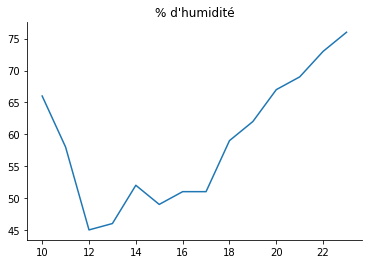

In [249]:
df2["%"].plot(title="% d'humidité")
sns.despine()

In [ ]:
pattern = "[a-zA-Z]*$"

# 7) Selenium

## 7.1) installation (possibilité : passer par le navigator 'Anaconda navigator)

### 7.1.1) installer l'interface python

In [261]:
!pip install selenium

### 7.1.2) télécharger l'application

1. Cf google : selenium


https://selenium-python.readthedocs.io/installation.html#downloading-python-bindings-for-selenium

https://sites.google.com/a/chromium.org/chromedriver/downloads

2. regardez votre version de chrome (chrome / à propos = > v 77.xxx ) 

3. Télécharger la mêle  version que le Chrome installé sur votre PC

https://chromedriver.storage.googleapis.com/index.html?path=77.0.3865.40/

4. Dézipper, et mettre l'application "driver" dans le même répertoire que le notebook (sinon noter le répertoire dans une variabe, et donner le chemin d'accès à python)

# 7.2) instanciation de selenium

In [380]:
import selenium
from selenium import webdriver
path   = "./chromedriver"
driver = webdriver.Chrome(executable_path=path)

## 7.3) se connecter à un site web avec user/pwd

In [381]:
url_insta = "https://www.instagram.com/accounts/login/?hl=fr&source=auth_switcher"
driver.get(url_insta)

In [384]:
USER_ID       = "ingenieur_5a"
USER_PASSWORD = "instagram_esilv"

In [385]:
css_selector = "input[name='username']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_ID)

In [386]:
css_selector = "input[name='password']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_PASSWORD)

In [387]:
css_selector = "button[type='submit']"
button       = driver.find_element_by_css_selector(css_selector)
button.click()

## 7.4) activer un bouton (pour faire disparaître la pop up en entrée) 

In [388]:
css_selector = "body > div.RnEpo.Yx5HN > div > div > div.mt3GC > button.aOOlW.bIiDR"
button       = driver.find_element_by_css_selector(css_selector)
button.click()

## 7.5) chercher des photos sur un sujet via la search bar

In [389]:
hashtag = '#basketball'

In [390]:
css_selector = "input[placeholder='Rechercher']"

In [391]:
search_bar = driver.find_element_by_css_selector(css_selector)

##### Clear : nettoyer une zone d'input

In [392]:
search_bar.clear()

In [393]:
search_bar.send_keys(hashtag)

#### utiliser les clefs claviers pour faire "entrer" dans la barre de recherche

In [394]:
from selenium.webdriver.common.keys import Keys 

In [396]:
search_bar.send_keys(Keys.ENTER)

## 7.6) enregistrer les photos

### 7.6.1) récupérer les urls des photos

In [397]:
css_selector = "img"
images       = driver.find_elements_by_css_selector(css_selector)
img_srcset   = [image.get_attribute('srcset') for image in images]
urls_images  = [x.split(" ")[0] for x in img_srcset]

### 7.6.2) enregistrer chaque photo via urllib.request

In [398]:
from urllib.request import urlretrieve as download

In [399]:
[download(url, f"image_{indice}.jpg") for indice, url in enumerate(urls_images[1:])]

[('image_0.jpg', <http.client.HTTPMessage at 0x1a2513c710>),
 ('image_1.jpg', <http.client.HTTPMessage at 0x1a252ad160>),
 ('image_2.jpg', <http.client.HTTPMessage at 0x1a24b26860>),
 ('image_3.jpg', <http.client.HTTPMessage at 0x1a24b26b38>),
 ('image_4.jpg', <http.client.HTTPMessage at 0x1a24b26d68>),
 ('image_5.jpg', <http.client.HTTPMessage at 0x1a24b265f8>),
 ('image_6.jpg', <http.client.HTTPMessage at 0x1a24b26668>),
 ('image_7.jpg', <http.client.HTTPMessage at 0x1a24b26978>),
 ('image_8.jpg', <http.client.HTTPMessage at 0x1a24b26cc0>),
 ('image_9.jpg', <http.client.HTTPMessage at 0x1a24b26b00>),
 ('image_10.jpg', <http.client.HTTPMessage at 0x1a24b268d0>),
 ('image_11.jpg', <http.client.HTTPMessage at 0x1a24b26198>),
 ('image_12.jpg', <http.client.HTTPMessage at 0x1a24b26a20>),
 ('image_13.jpg', <http.client.HTTPMessage at 0x1a252ca5c0>),
 ('image_14.jpg', <http.client.HTTPMessage at 0x1a252caf98>),
 ('image_15.jpg', <http.client.HTTPMessage at 0x1a25174710>),
 ('image_16.jpg', 

### 7.6.3) tester que les photos sont bien enregistrées :

In [400]:
import PIL

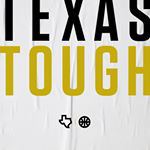

In [401]:
PIL.Image.open(f"image_24.jpg") 

## 7.7) Scroll down

In [402]:
driver.execute_script("return document.body.scrollHeight")

4184

In [403]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")